Sample ID: HCR 3.12 S3  
Section: 200um coronal section from ALM  
Mouse: ANM471122 C57BI/6NCrl, sex M, DOB 10/21/2019  
Genes labelled: Vip (514 channel), Tac2 (546 channel), Npy2r (594 channel), Car4 (647 channel)  
Microscope: Zeiss 880 (regular confocal mode)  
Objective: 40X oil immersion 

# Setup

## Imports

In [4]:
%matplotlib inline    

# Create a Qt event loop for napari
from IPython import get_ipython
ipython = get_ipython()
ipython.magic("gui qt5")             

import napari
from PIL import Image

import numpy as np
import cv2

import matplotlib.pyplot as plt

import time

from os.path import sep
import pickle as pkl
import importlib

# Local modules

import get_metadata

from utils import diff_gauss
from utils import find_threshold

from segmentation import get_masks
from segmentation import get_background

from plotting import napari_rendering
from plotting import scatter_plots

from lipofuscin import annotated_lipo_rois
from lipofuscin import filter_lipo
from lipofuscin import detect

from expression import signal_and_bg

from classification import get_labels

from cell_depths import get_depths

# Enable autoreload of local modules
%load_ext autoreload
%autoreload 2        # Autoreload all modules except those excluded using %aimport
%aimport napari, PIL.Image, numpy, cv2, matplotlib.pyplot, time, importlib 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Reload local modules 
# Ideally, modules should be auto-reloaded 

importlib.reload(get_metadata)

# Segmentation
importlib.reload(get_masks)
importlib.reload(get_background)

# Lipofuscin
importlib.reload(annotated_lipo_rois)
importlib.reload(filter_lipo)
importlib.reload(detect)

# Plotting
importlib.reload(napari_rendering)
importlib.reload(scatter_plots)

# Expression
importlib.reload(signal_and_bg)

# Classification
importlib.reload(get_labels)

# Cell depths
importlib.reload(get_depths)

# Utils
importlib.reload(diff_gauss)
importlib.reload(find_threshold)

## Specify data path

In [5]:
data_path = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.12\\S3'
metadata_file = 'metadata.pkl'

## Metadata

In [83]:
um_per_px = 0.13

raw_image_path = '{0}{1}S3_raw_tiff_images'.format(data_path, sep)
seg_image_path = '{0}{1}S5_blurred_tiff_images'.format(data_path, sep)
plots_path = '{0}{1}Plots'.format(data_path, sep)
filt_image_path = '{0}{1}Filtered_tiff_images'.format(data_path, sep)

plane_nos = range(1, 11)
base_filename = 'S3_DAPI_546_647_514_594_2020_03_16__00_43_13_z'
genes = ['Vip', 'Tac2', 'Car4', 'Npy2r']
channel_names = {'Vip': '_ChS1-T3_ORG',
                 'Tac2': '_ChS2-T1_ORG',
                 'Npy2r': '_ChS2-T3_ORG',
                 'Car4': '_ChS2-T2_ORG'}
n_planes = len(plane_nos)
print('Number of planes: {0}'.format(n_planes))

# Create 4D array to store images
img = Image.open('{0}{1}{2}{3}{4}.tif'.format(raw_image_path, sep, base_filename, str(plane_nos[0]).zfill(2),
                                             channel_names[genes[0]]))

h = img.height
w = img.width

metadata = get_metadata.get_metadata(data_path, metadata_file, um_per_px, raw_image_path, seg_image_path, plots_path,
                                    filt_image_path, plane_nos, base_filename, genes, channel_names, n_planes, h, w)



Number of planes: 10


# Napari rendering

In [92]:
# Create viewer
viewer = napari_rendering.create_viewer()

##### Images

In [93]:
# Raw images
napari_rendering.images(data_path, metadata_file, viewer, planes = [0, 1, 2, 3, 4, 5, 6])

Loading Vip images: 0.0 seconds
     Plane 1, 0.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


     Plane 2, 3.0 seconds
     Plane 3, 6.0 seconds
     Plane 4, 9.0 seconds
     Plane 5, 12.0 seconds
     Plane 6, 15.0 seconds
     Plane 7, 18.0 seconds
Loading Tac2 images: 25.0 seconds
     Plane 1, 25.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


     Plane 2, 27.0 seconds
     Plane 3, 30.0 seconds
     Plane 4, 33.0 seconds
     Plane 5, 35.0 seconds
     Plane 6, 37.0 seconds
     Plane 7, 40.0 seconds
Loading Car4 images: 46.0 seconds
     Plane 1, 46.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


     Plane 2, 49.0 seconds
     Plane 3, 51.0 seconds
     Plane 4, 54.0 seconds
     Plane 5, 57.0 seconds
     Plane 6, 59.0 seconds
     Plane 7, 62.0 seconds
Loading Npy2r images: 68.0 seconds
     Plane 1, 68.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


     Plane 2, 71.0 seconds
     Plane 3, 73.0 seconds
     Plane 4, 76.0 seconds
     Plane 5, 79.0 seconds
     Plane 6, 81.0 seconds
     Plane 7, 84.0 seconds


In [86]:
# Filtered images
napari_rendering.filt_images(data_path, metadata_file, viewer, planes = [0, 1], image_type = 'filt')

Loading Vip images: 0.0 seconds
     Plane 1, 0.0 seconds
     Plane 2, 1.0 seconds
Loading Tac2 images: 3.0 seconds
     Plane 1, 3.0 seconds
     Plane 2, 4.0 seconds
Loading Car4 images: 7.0 seconds
     Plane 1, 7.0 seconds
     Plane 2, 8.0 seconds
Loading Npy2r images: 10.0 seconds
     Plane 1, 10.0 seconds
     Plane 2, 11.0 seconds


##### Cell masks

In [94]:
napari_rendering.cell_masks(data_path, metadata_file, viewer, planes = [0, 1, 2, 3, 4, 5, 6])

Cell 10
Cell 20
Cell 20
Cell 30
Cell 30
Cell 40
Cell 50
Cell 30
Cell 40
Cell 50
Cell 60
Cell 50
Cell 80
Cell 70
Cell 80
Cell 90


##### Annotated lipofuscin rois

In [62]:
napari_rendering.lipo_rois(data_path, metadata_file, viewer, planes = [0, 1])

No lipofuscin rois in the specified planes


##### Masks with lipofuscin exluded

In [181]:
napari_rendering.no_lipo_masks(data_path, metadata_file, viewer, planes = [0, 1])

# Segmentation

## Get cell pixels

In [34]:
cell_data, n_cells = get_masks.get_masks(data_path, metadata_file)
cell_pixels = get_masks.get_cell_pixels(data_path, metadata_file)
all_cell_pixels = get_masks.get_all_cell_pixels(data_path, metadata_file)

101 cell masks found
Cell pixels found in G:\Shared drives\as_share\HCR\HCR 3.12\S3\cell_pixels.pkl
Cell pixels found in G:\Shared drives\as_share\HCR\HCR 3.12\S3\all_cell_pixels.pkl


In [22]:
cells = list(cell_pixels.keys())
for cell in cells:
    planes = list(cell_pixels[cell].keys())
    for plane in planes:
        cell_pixels[cell][int(plane)] = np.array(cell_pixels[cell][plane])
        #cell_pixels[cell].pop(plane)
    planes = [int(plane) for plane in planes]
    cell_data[cell]['z_planes'] = planes


In [32]:
with open('{0}{1}{2}'.format(data_path, sep, metadata['cell_pixels_file']), 'wb') as f:
            pkl.dump(cell_pixels, f)

## Get background pixels

In [40]:
bg_pixels, centers = get_background.get_bg_pixels(data_path, metadata_file)
all_bg_pixels = get_background.get_all_bg_pixels(data_path, metadata_file)

Finding pixels in local background of cells


## Segment cells

# Lipofuscin exclusion

## Annotated lipofuscin rois

In [42]:
# Load existing rois
l_rois = annotated_lipo_rois.get_rois(data_path, metadata_file)
all_lipo_pixels, lipo_pixels_roi = annotated_lipo_rois.get_cell_lipo_pixels(data_path, metadata_file)

11 rois
No saved data found, finding pixels in lipofuscin rois
Calculated grid coordinates, 85.0 seconds
ROI 0
ROI 1
ROI 2
ROI 3
ROI 4
ROI 5
ROI 6
ROI 7
ROI 8
ROI 9
ROI 10


##### Draw new rois

In [64]:
viewer.add_shapes(data = None, name = 'Lipofuscin rois', edge_color = 'white')

<Shapes layer 'Lipofuscin ROIs' at 0x1f589b08>

In [73]:
try:
    with open('{0}{1}{2}'.format(data_path, sep, metadata['lipo_rois_file']), 'rb') as f:
        l_rois = pkl.load(f) 
    l_rois = np.append(l_rois, viewer.layers['Lipofuscin rois'].data, axis = 0)
except:
    l_rois = viewer.layers['Lipofuscin rois'].data
    
with open('{0}{1}{2}'.format(data_path, sep, metadata['lipo_rois_file']), 'wb') as f:
    pkl.dump(l_rois, f) 
    
n_rois = len(l_rois)
print('{0} lipofuscin rois'.format(n_rois))

6 lipofuscin rois


## Detect lipofuscin rois in cells and background

In [44]:
# Filter images - 5.5 min
cell_filt_values, bg_filt_values, annotated_lipo_filt_values = filter_lipo.filter(data_path, metadata_file, 
                                                                                  thresh_scale = 1,
                                                                                  save_tiffs = True)



Filtering Vip images: 0.0 seconds
Plane 1, 0.0 seconds
Saving plane 0: 25.0 seconds
Plane 2, 26.0 seconds
Saving plane 1: 53.0 seconds
Plane 3, 54.0 seconds
Saving plane 2: 84.0 seconds
Plane 4, 85.0 seconds
Saving plane 3: 114.0 seconds
Plane 5, 115.0 seconds
Saving plane 4: 144.0 seconds
Plane 6, 145.0 seconds
Saving plane 5: 173.0 seconds
Plane 7, 175.0 seconds
Saving plane 6: 203.0 seconds
Plane 8, 204.0 seconds
Saving plane 7: 233.0 seconds
Plane 9, 234.0 seconds
Saving plane 8: 263.0 seconds
Plane 10, 264.0 seconds
Saving plane 9: 294.0 seconds
Filtering Tac2 images: 295.0 seconds
Plane 1, 295.0 seconds
Saving plane 0: 324.0 seconds
Plane 2, 325.0 seconds
Saving plane 1: 354.0 seconds
Plane 3, 355.0 seconds
Saving plane 2: 385.0 seconds
Plane 4, 386.0 seconds
Saving plane 3: 415.0 seconds
Plane 5, 416.0 seconds
Saving plane 4: 449.0 seconds
Plane 6, 451.0 seconds
Saving plane 5: 480.0 seconds
Plane 7, 482.0 seconds
Saving plane 6: 510.0 seconds
Plane 8, 511.0 seconds
Saving plane

In [45]:
# Get mahalanobis distance from lipofuscin pixels
m_dist_cells, m_dist_bg, m_dist_lipo = detect.get_m_dist(data_path, metadata_file)

(array([14., 33., 62., 63., 66., 72., 57., 37., 42., 28., 26., 22., 22.,
        19., 23., 17.,  4.,  4.,  3.,  2.]),
 array([0.83835745, 0.99036245, 1.14236745, 1.29437245, 1.44637745,
        1.59838245, 1.75038745, 1.90239245, 2.05439745, 2.20640245,
        2.35840745, 2.51041245, 2.66241745, 2.81442245, 2.96642745,
        3.11843245, 3.27043745, 3.42244245, 3.57444745, 3.72645245,
        3.87845745]),
 <a list of 20 Patch objects>)

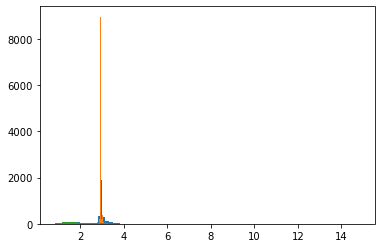

In [48]:
cell = 95
plane = cell_data[cell]['z_planes'][0]

plt.figure()
plt.hist(m_dist_cells[cell][plane], 100)
plt.hist(m_dist_bg[cell][plane], 1000)
plt.hist(m_dist_lipo, 20)

In [49]:
cell_pixels_no_lipo, bg_pixels_no_lipo = detect.get_lipo(data_path, metadata_file, thresh_scale = 1.5)

# Measure expression

In [59]:
get_masks.get_cells_in_plane(data_path, metadata_file, 9)

[98]

In [53]:
# Filter images and calculate signal (2.5 min)
signal_raw, signal_filt, bg_raw, bg_filt = signal_and_bg.get_signal_and_bg(data_path, metadata_file, save_tiffs = True)


Filtering Vip images: 0.0 seconds
Plane 1, 0.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Saving plane 0: 14.0 seconds
Plane 2, 15.0 seconds
Saving plane 1: 31.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Plane 3, 32.0 seconds
Saving plane 2: 48.0 seconds
Plane 4, 49.0 seconds
Saving plane 3: 66.0 seconds
Plane 5, 67.0 seconds
Saving plane 4: 84.0 seconds
Plane 6, 85.0 seconds
Saving plane 5: 101.0 seconds
Plane 7, 102.0 seconds
Saving plane 6: 121.0 seconds
Plane 8, 122.0 seconds
Saving plane 7: 138.0 seconds
Plane 9, 140.0 seconds
Saving plane 8: 156.0 seconds
Plane 10, 157.0 seconds
Saving plane 9: 173.0 seconds
Filtering Tac2 images: 174.0 seconds
Plane 1, 174.0 seconds
Saving plane 0: 190.0 seconds
Plane 2, 191.0 seconds
Saving plane 1: 207.0 seconds
Plane 3, 208.0 seconds
Saving plane 2: 224.0 seconds
Plane 4, 225.0 seconds
Saving plane 3: 242.0 seconds
Plane 5, 243.0 seconds
Saving plane 4: 259.0 seconds
Plane 6, 260.0 seconds
Saving plane 5: 277.0 seconds
Plane 7, 278.0 seconds
Saving plane 6: 295.0 seconds
Plane 8, 296.0 seconds
Saving plane 7: 313.0 seconds
Plane 9, 314.0 seconds
Saving plane 8: 331.0 seconds
Plane 10, 332.0 seconds
Saving plane 9: 349.0 seconds
Filtering Car4

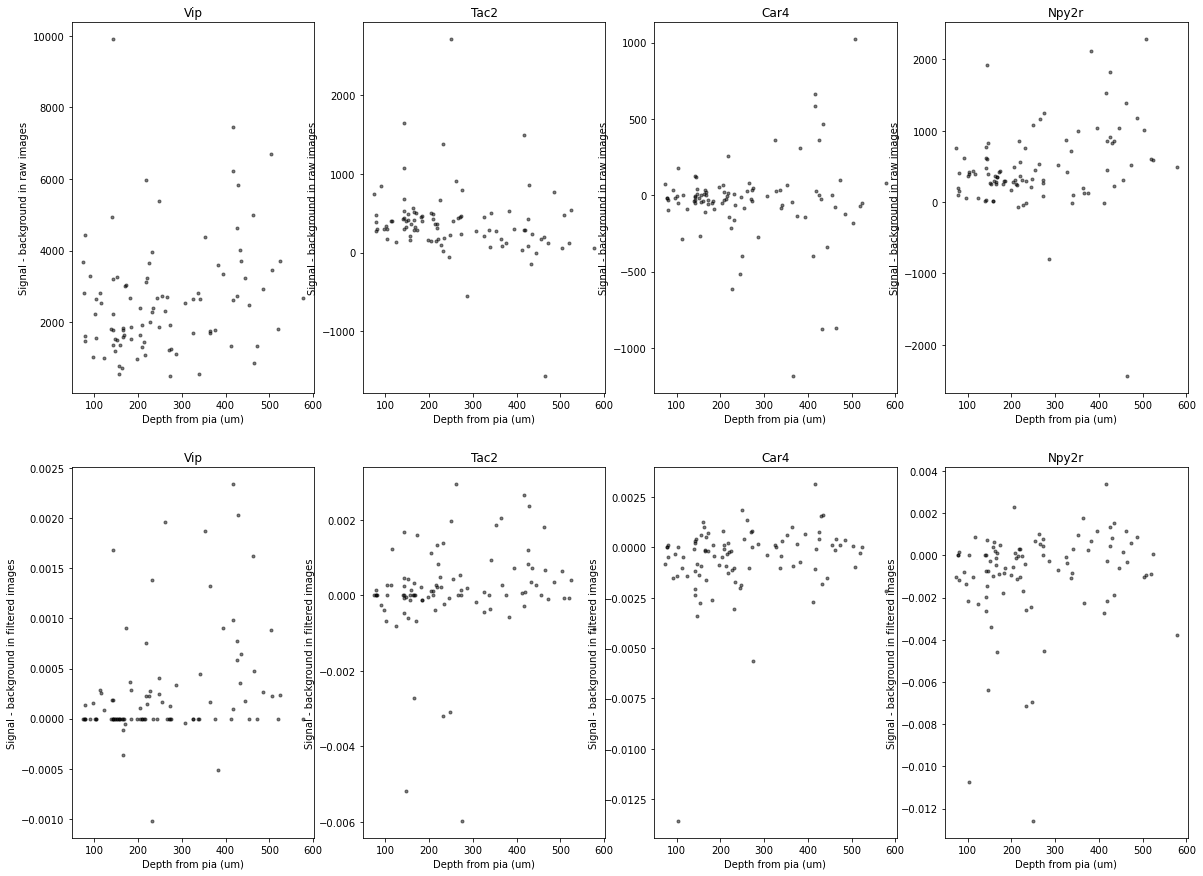

In [64]:
# Plot signal
scatter_plots.signal_vs_depth(data_path, metadata_file)

# Cell depths

In [62]:
# Draw surface of cortex
surface_layer = get_depths.draw_surface(data_path, metadata_file, viewer)

Text(0, 0.5, '# cells')

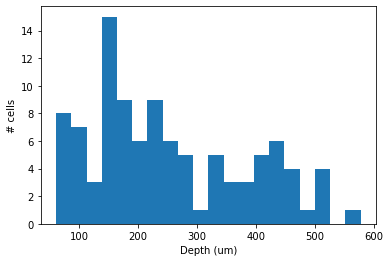

In [63]:
# Calculate depths
depths = get_depths.get_depths(data_path, metadata_file, surface_layer)
plt.figure()
plt.hist(depths, 20)
plt.xlabel('Depth (um)')
plt.ylabel('# cells')

# Classification

In [89]:
bs_raw, bs_filt = get_labels.get_bootstrap(data_path, metadata_file)

Loading Vip images: 0.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (134858363 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Cell 29 plane 1: all pixels excluded from cell or background
Cell 24 plane 2: all pixels excluded from cell or background
Cell 24 plane 3: all pixels excluded from cell or background
Cell 69 plane 5: all pixels excluded from cell or background
Cell 72 plane 5: all pixels excluded from cell or background
Cell 69 plane 6: all pixels excluded from cell or background
Cell 83 plane 6: all pixels excluded from cell or background
Cell 83 plane 7: all pixels excluded from cell or background
Cell 92 plane 7: all pixels excluded from cell or background
Loading Tac2 images: 59.0 seconds
Cell 29 plane 1: all pixels excluded from cell or background
Cell 24 plane 2: all pixels excluded from cell or background
Cell 24 plane 3: all pixels excluded from cell or background
Cell 69 plane 5: all pixels excluded from cell or background
Cell 72 plane 5: all pixels excluded from cell or background
Cell 69 plane 6: all pixels excluded from cell or background
Cell 83 plane 6: all pixels excluded from cell or b

In [90]:
pv_raw, pv_filt = get_labels.get_p_values(data_path, metadata_file)

ValueError: zero-dimensional arrays cannot be concatenated

In [91]:
bs_raw

{'Vip': {1: {0: 1271.343, 1: 1107.4485},
  2: {0: 3274.053, 1: 1739.3765},
  3: {1: 1351.441},
  4: {0: 1458.689, 1: 1460.0745},
  5: {0: 1427.2105},
  6: {0: 1360.572},
  7: {0: 1318.7645},
  8: {0: 1781.0575, 1: 1505.8595},
  9: {0: 1048.7105},
  10: {0: 1359.126},
  11: {1: 1324.4835, 2: 1245.321},
  12: {1: 744.609, 2: 675.786},
  13: {2: 885.434, 3: 833.586},
  14: {2: 1368.3005, 3: 1452.5765, 4: 1172.2575},
  15: {1: 2502.8975, 2: 3970.6775},
  16: {2: 2004.032, 3: 1808.592},
  17: {1: 1484.812, 2: 1243.5215},
  18: {1: 1036.446, 2: 862.271},
  19: {1: 1309.597, 2: 1276.9705},
  20: {1: 1197.932, 2: 1183.172},
  21: {1: 1633.5075, 2: 1569.5245},
  22: {1: 1155.4745, 2: 1182.641},
  23: {1: 1225.7135, 2: 1446.264},
  24: {2: 0, 3: 0},
  25: {1: 1037.6465, 2: 1063.2225},
  26: {1: 1369.5005, 2: 1286.0635},
  27: {1: 2123.41, 2: 1900.8155},
  28: {1: 1282.3895},
  29: {1: 0, 2: 964.241, 3: 942.6535},
  30: {2: 1638.84, 3: 1264.5745, 4: 1793.0},
  31: {2: 1170.3925},
  32: {2: 1568.8

# Debugging

In [77]:
n_sample = 1000
# Load metadata
with open('{0}{1}{2}'.format(data_path, sep, metadata_file), 'rb') as f:
    metadata = pkl.load(f)
raw_image_path = metadata['raw_image_path']
filt_image_path = metadata['filt_image_path']
n_planes = metadata['n_planes']
h = metadata['h']
w = metadata['w']
base_filename = metadata['base_filename']
channel_names = metadata['channel_names']
sigma_small = metadata['signal_sigma_small']
sigma_large = metadata['signal_sigma_large']
thresh_scale = metadata['signal_thresh_scale']
if genes == None:
    genes = metadata['genes']

# Load background pixels
bg_pixels_no_lipo_file = metadata['bg_pixels_no_lipo_file']
with open('{0}{1}{2}'.format(data_path, sep, bg_pixels_no_lipo_file), 'rb') as f:
    bg_pixels_no_lipo = pkl.load(f)

cell_pixels_no_lipo_file = metadata['cell_pixels_no_lipo_file']
with open('{0}{1}{2}'.format(data_path, sep, cell_pixels_no_lipo_file), 'rb') as f:
    cell_pixels_no_lipo = pkl.load(f)

# Allocate variables to store bootstrap values
bs_raw = {gene: {cell: {} for cell in cell_pixels_no_lipo.keys()} for gene in genes}
bs_filt = {gene:{cell: {} for cell in cell_pixels_no_lipo.keys()} for gene in genes}

t0 = time.time()
for gene in genes:

    print('Loading {0} images: {1} seconds'.format(gene, np.round(time.time() - t0)))

    for plane in range(n_planes):
        img = Image.open('{0}{1}{2}{3}{4}.tif'.format(raw_image_path, sep, base_filename, str(plane + 1).zfill(2),
                                                        channel_names[gene]))
        im_raw = np.array(img)

        img = Image.open('{0}{1}{2}_plane{3}_filt_sigma={4},{5}_thresh={6}.tif'.format(filt_image_path, sep, gene,
                                                                        str(plane + 1).zfill(2),
                                                                        sigma_small, sigma_large,
                                                                        thresh_scale))
        im_filt = np.array(img)
        # Get bootstrap values in raw and filtered images
        cells = metadata['cells_in_plane'][plane]
        for cell in cells:

            bg_px = bg_pixels_no_lipo[cell][plane]
            cell_px = cell_pixels_no_lipo[cell][plane]
            n_verts_bg = bg_px.shape[0]
            n_verts_cell = cell_px.shape[0]
            bs_raw[gene][cell][plane] = 0
            bs_filt[gene][cell][plane] = 0
            if np.logical_or(n_verts_bg == 0, n_verts_cell == 0):
                print('Cell {0} plane {1}: all pixels excluded from cell or background'.format(cell, plane))
            else:
                samples = np.random.choice(np.linspace(0, n_verts_bg - 1, n_verts_bg).astype(int),
                                       (n_verts_cell, n_sample), replace = True)

                for s in range(n_sample):
                    x = bg_px[0, samples[:, s]]
                    y = bg_px[1, samples[:, s]]

                    bs_raw[gene][cell][plane] += np.mean(im_raw[x, y])
                    bs_filt[gene][cell][plane] += np.mean(im_filt[x, y])

                bs_raw[gene][cell][plane] /= n_sample
                bs_filt[gene][cell][plane] /= n_sample

Loading Vip images: 0.0 seconds


IndexError: index 270 is out of bounds for axis 1 with size 2

In [80]:
bg_px.shape

(313, 2)

In [78]:
cell

1

In [74]:
bg_pixels_no_lipo[cell][2].shape

(275, 2)